<a href="https://colab.research.google.com/github/NayanAdhikary/sf-salary-predictor/blob/main/01_salary_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

####1. Load cleaned data

In [ ]:
df = pd.read_csv("data_clean/Salaries_clean.csv")
print("Data loaded:", df.shape)

Data loaded: (148653, 13)


/tmp/ipython-input-3861591412.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data_clean/Salaries_clean.csv")


####2.Feature Engineering (FIXED)

In [ ]:
def get_job_group(job_title):
  job = job_title.lower()
  if 'police' in job or 'officer' in job: return 'Police'
  if 'fire' in job: return 'Fire'
  if 'nurse' in job or 'health' in job: return 'Medical'
  return 'Other'

df['JobGroup'] = df['JobTitle'].apply(get_job_group)
df['Experience'] = 2024 - df['Year'] #Years since hire


### 3. Select features + encode CATEGORICAL (FIXED!)

In [ ]:
le = LabelEncoder()
df['JobGroup_encoder'] = le.fit_transform(df['JobGroup'])

X = df[['Experience', 'JobGroup_encoder']] #Numeric only!
y = df['TotalPay']

### 4. Train/Test Split (Missing!)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Train Model (Fixed!)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### 6. Predict + Evaluate (Missing!)

In [ ]:
y_pred = model.predict(X_test)

print("✅ Model Results:")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: ${mean_absolute_error(y_test, y_pred):,.0f}")
print(f"RMSE: ${np.sqrt(mean_absolute_error(y_test, y_pred)):.0f}")

✅ Model Results:
R² Score: 0.125
MAE: $36,289
RMSE: $190


### 7. Visualize predictions

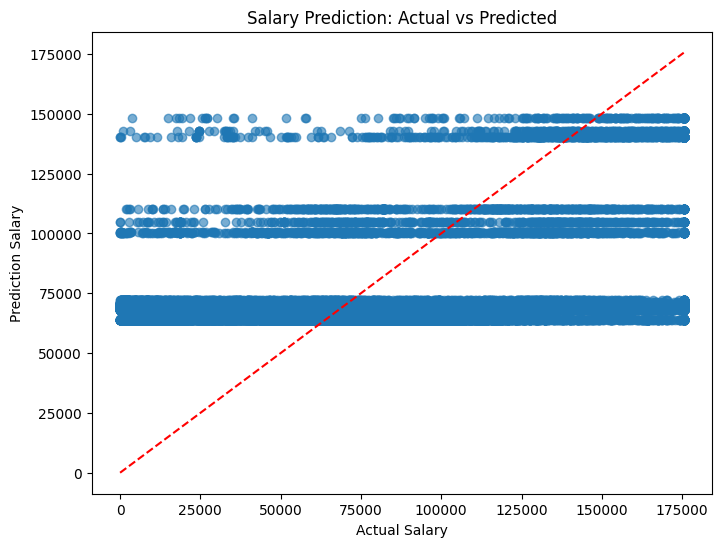

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel("Prediction Salary")
plt.title("Salary Prediction: Actual vs Predicted")
plt.show()